MovieWriter ffmpeg unavailable; using Pillow instead.


num count:  22


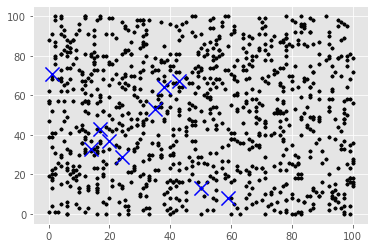

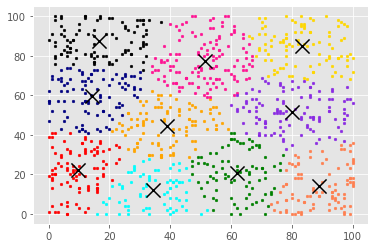

In [69]:
import random
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

count=1
x = []
y = []
frames = []
k = 1000

for i in range(k):
    x.append(random.randint(0,100))
    y.append(random.randint(0,100))
    frames.append((x,y))
X = np.array(list(zip(x,y)))
plt.scatter(x,y,c='black',s=10)


k = 10
C_x = np.random.randint(0,np.max(X)-20,size=k)
C_y = np.random.randint(0,np.max(X)-20,size=k)
C = np.array(list(zip(C_x,C_y)),dtype=np.float32)

plt.scatter(x,y,c='#050505',s=10)
plt.scatter(C_x,C_y,marker="x",s=200,c='b')
plt.savefig('K-Means.png')

C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = dist(C,C_old,None)
fig, ax = plt.subplots()
camera = Camera(fig)
while error!=0:
    for i in range(len(X)):
        distances = dist(X[i],C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i] = np.mean(points,axis=0)
    error = dist(C,C_old,None)
    colors = ["black","red","coral","orange","gold","green","cyan","navy","deeppink","blueviolet"]
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        ax.scatter(C[i, 0], C[i, 1], marker='x', s=200, c=colors[0])
    camera.snap()
    count +=1

anim = camera.animate(interval = 500,blit=True)
anim.save('K-Means.gif')
print("num count: ",count)

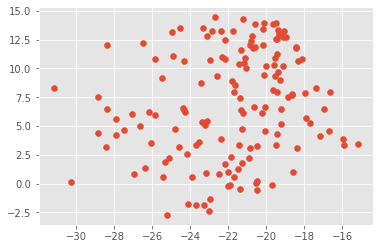

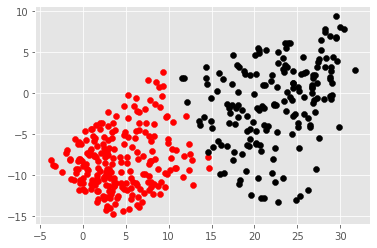

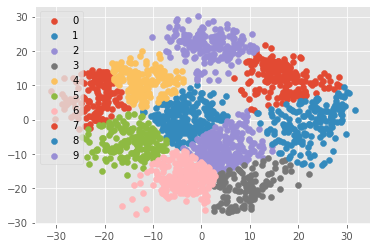

SyntaxError: EOL while scanning string literal (<ipython-input-59-374f8e4ac8a0>, line 8)

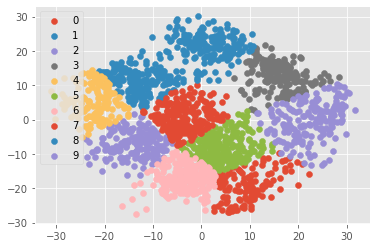